In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.feature_selection import VarianceThreshold

In [9]:
from sklearn.feature_selection import f_classif ,f_regression

from sklearn.feature_selection import SelectKBest,SelectPercentile

In [2]:
# train and test data
train_data=pd.read_csv(r'C:\Users\User\Desktop\ms\model selection\train.csv')

In [3]:
y=train_data.iloc[:,-1]
x=train_data.iloc[:,:-1]

In [4]:
# train_test split of data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
X_train.shape,X_test.shape

((60816, 370), (15204, 370))

# Basic method

In [6]:
#removing constant feature
constant_filter=VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

constant_list=[not temp for temp in constant_filter.get_support()]

X_train_filter=constant_filter.transform(X_train)

X_test_filter=constant_filter.transform(X_test)

In [7]:
#QUASI CONSTANT FEATURE REMOVAL

qconst_filter=VarianceThreshold(threshold=.01)
qconst_filter.fit(X_test_filter)

X_train_quasi_filter=qconst_filter.transform(X_train_filter)

X_test_quasi_filter=qconst_filter.transform(X_test_filter)

In [8]:
# DUPLICATE FEATURE REMOVING

X_train_T=X_train_quasi_filter.T
X_test_T=X_test_quasi_filter.T

X_train_T=pd.DataFrame(X_train_T)
X_test_T=pd.DataFrame(X_test_T)

duplicated_feature=X_train_T.duplicated()

feature_to_keep=[not index for index in duplicated_feature]

X_train_unique=pd.DataFrame(X_train_T[feature_to_keep].T)

X_test_unique=pd.DataFrame(X_test_T[feature_to_keep].T)

# ANOVA Test method for classifiction

In [10]:
select=f_classif(X_train_unique,y_train)

In [11]:
p_values=pd.Series(select[1])
p_values.index=X_train_unique.columns
p_values.sort_values(ascending=False,inplace=True)

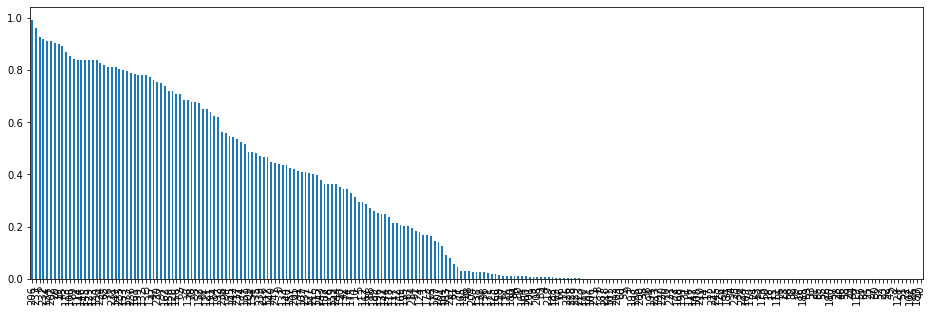

In [12]:
p_values.plot.bar(figsize=(16,5))

In [13]:
p_values=p_values[p_values<.05]

In [14]:
p_values

77      4.664286e-02
165     2.971512e-02
148     2.786315e-02
48      2.756253e-02
204     2.710414e-02
           ...      
22     4.008211e-240
102    4.072232e-243
86     1.079182e-253
183    4.199639e-295
40     2.031298e-297
Length: 123, dtype: float64

In [16]:
X_train_p=X_train_unique[p_values.index]

X_test_p=X_test_unique[p_values.index]

In [17]:
X_train_p.shape,X_test_p.shape

((60816, 123), (15204, 123))

In [18]:
# model evalution
def run_RandomForest(X_train,X_test,y_train,y_test):
    rf=RandomForestClassifier(n_estimators=100,random_state=42)
    rf.fit(X_train,y_train)
    pred=rf.predict(X_test)
    print("accuracy of model:",accuracy_score(y_test,pred))

In [19]:
%%time
run_RandomForest(X_train_unique,X_test_unique,y_train,y_test)

accuracy of model: 0.9597474348855565
Wall time: 36.6 s


In [20]:
%%time
run_RandomForest(X_train_p,X_test_p,y_train,y_test)

accuracy of model: 0.9529071297027099
Wall time: 27 s
